In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [4]:
df = pd.read_csv("Customer Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [7]:
df.head()
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#replacing blank total charge with 0 as tenure is 0

In [9]:
# Converting blanks to 0 as Tenure is 0.
# Converting data type of TotalCharge Column to Float

df["TotalCharges"] = df["TotalCharges"].replace(" ", "0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [11]:
# Null Checking

df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [13]:
# Checking for duplicate values

df.duplicated().sum()

np.int64(0)

In [14]:
# Fixing values for Senior Citizen
# Converting values from 0 and 1 to false and true

df["SeniorCitizen"] = df["SeniorCitizen"].map({1: "yes", 0: "no"})

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,no,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,no,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,no,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,no,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,no,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


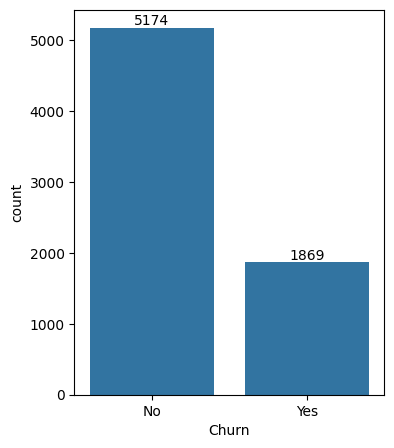

In [21]:
# Count of customers
plt.figure(figsize = (4,5))
ax = sns.countplot(x="Churn", data=df)
ax.bar_label(ax.containers[0])
plt.show()

#A noticeable portion of customers have churned compared to retained customers.
#This confirms churn is a material business problem and requires focused intervention.

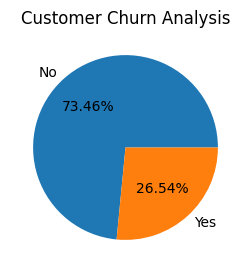

In [15]:
plt.figure(figsize = (3,3))
gb = df.groupby("Churn").agg({'Churn' : "count"})
plt.pie(gb['Churn'], labels = gb.index, autopct = "%1.2f%%")
plt.title("Customer Churn Analysis")
plt.show()

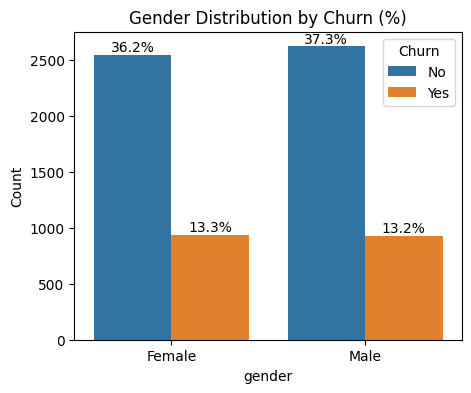

In [26]:
plt.figure(figsize=(5,4))
ax = sns.countplot(x="gender", data=df, hue="Churn")

total = len(df)

for container in ax.containers:
    labels = [f"{v/total:.1%}" for v in container.datavalues]
    ax.bar_label(container, labels=labels)

plt.title("Gender Distribution by Churn (%)")
plt.ylabel("Count")
plt.show()


#Churn distribution across gender is relatively balanced.

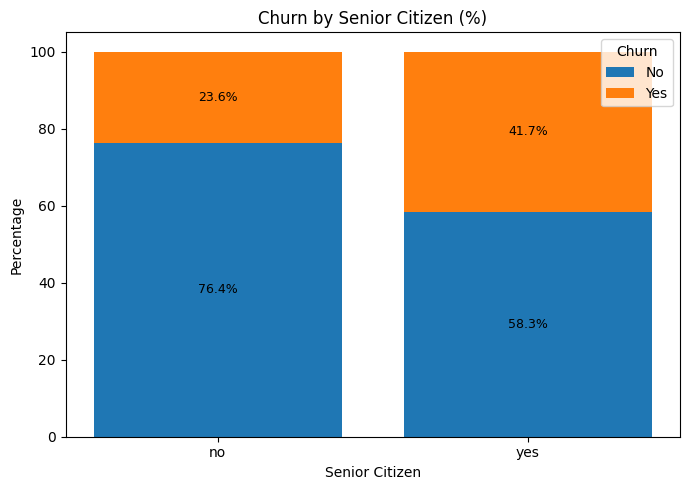

In [28]:
# Count churn by SeniorCitizen
count_df = (
    df.groupby(["SeniorCitizen", "Churn"])
      .size()
      .unstack(fill_value=0)
)

# Convert counts to percentage per SeniorCitizen
percent_df = count_df.div(count_df.sum(axis=1), axis=0) * 100

# Plot stacked bar chart
plt.figure(figsize=(7, 5))

bottom = [0] * len(percent_df)

for churn_status in percent_df.columns:
    values = percent_df[churn_status]
    bars = plt.bar(
        percent_df.index.astype(str),
        values,
        bottom=bottom,
        label=churn_status
    )

    # Add percentage labels
    for i, v in enumerate(values):
        if v > 3:  # avoid clutter for small values
            plt.text(
                i,
                bottom[i] + v / 2,
                f"{v:.1f}%",
                ha="center",
                va="center",
                fontsize=9
            )

    bottom = [bottom[i] + values.iloc[i] for i in range(len(values))]

plt.title("Churn by Senior Citizen (%)")
plt.xlabel("Senior Citizen")
plt.ylabel("Percentage")
plt.legend(title="Churn")

plt.tight_layout()
plt.show()

#Senior citizens show a higher churn rate compared to non-senior customers.
#Although senior citizens form a smaller portion of the total customer base, their likelihood to churn is noticeably higher.

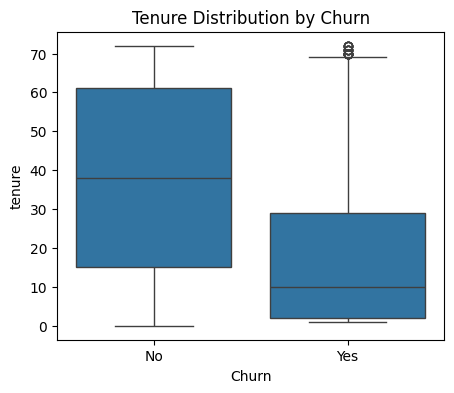

In [50]:
plt.figure(figsize=(5,4))
sns.boxplot(x="Churn", y="tenure", data=df)
plt.title("Tenure Distribution by Churn")
plt.show()

#Customers who churn typically have a much lower tenure (median around 8–10 months).
#Non-churned customers show a significantly higher median tenure (~38–40 months).
#This indicates churn is heavily concentrated in the early stages of the customer lifecycle.

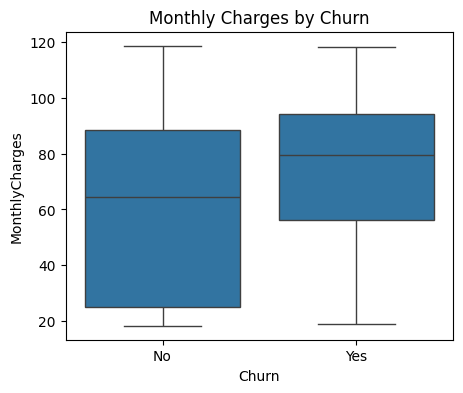

In [51]:
plt.figure(figsize=(5,4))
sns.boxplot(x="Churn", y="MonthlyCharges", data=df)
plt.title("Monthly Charges by Churn")
plt.show()

#Monthly charges show moderate correlation with churn.
#Customers with higher monthly charges tend to churn more frequently.

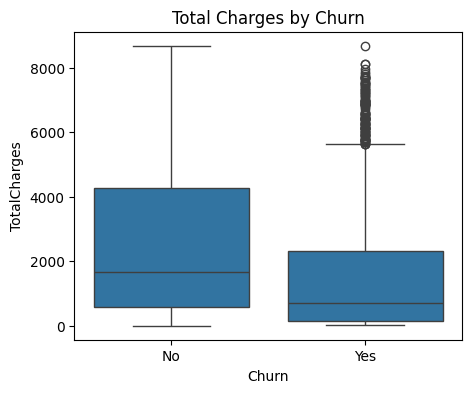

In [52]:
plt.figure(figsize=(5,4))
sns.boxplot(x="Churn", y="TotalCharges", data=df)
plt.title("Total Charges by Churn")
plt.show()


#Customers who churn tend to have lower total charges compared to retained customers.
#This is largely driven by their shorter tenure, not necessarily lower pricing.

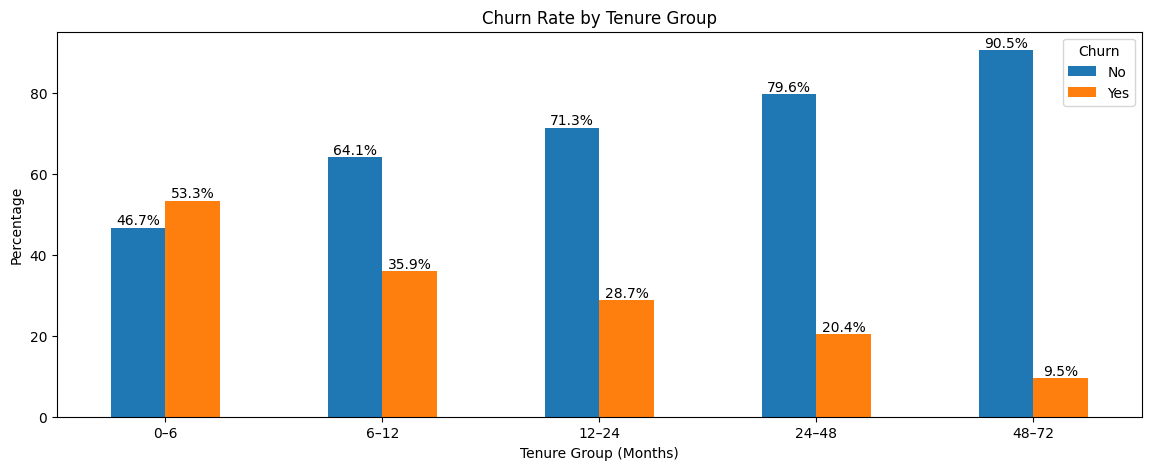

In [59]:
df["tenure_bin"] = pd.cut(
    df["tenure"],
    bins=[0, 6, 12, 24, 48, 72],
    labels=["0–6", "6–12", "12–24", "24–48", "48–72"]
)

ct = pd.crosstab(df["tenure_bin"], df["Churn"], normalize="index") * 100

ax = ct.plot(kind="bar", figsize=(14,5))

for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%")

plt.xlabel("Tenure Group (Months)")
plt.ylabel("Percentage")
plt.title("Churn Rate by Tenure Group")
plt.xticks(rotation=0)
plt.show()


#Churn is heavily concentrated among customers with low tenure (0–12 months).
#As tenure increases, the churn rate declines sharply.

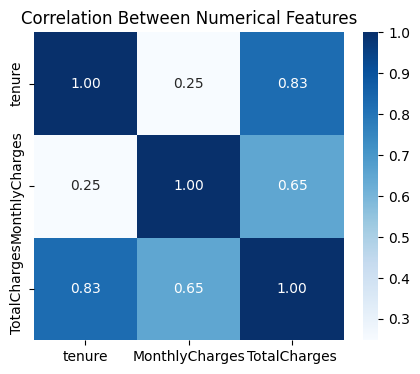

In [54]:
plt.figure(figsize=(5,4))
sns.heatmap(
    df[["tenure", "MonthlyCharges", "TotalCharges"]].corr(),
    annot=True,
    cmap="Blues",
    fmt=".2f"
)
plt.title("Correlation Between Numerical Features")
plt.show()


#Tenure and Total Charges show a strong positive correlation, which is expected.
#Monthly Charges have a moderate relationship with Total Charges.

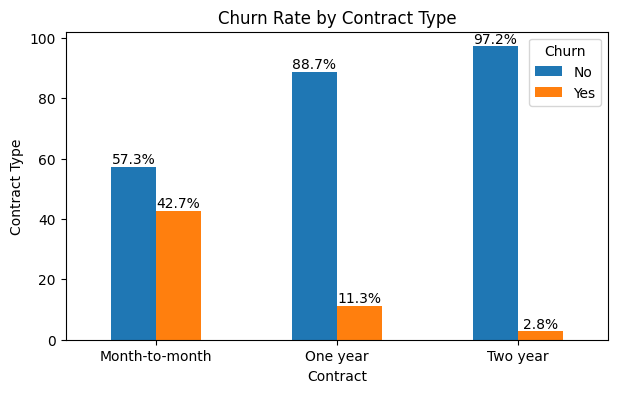

In [49]:
ct = pd.crosstab(df["Contract"], df["Churn"], normalize="index") * 100

ax = ct.plot(kind="bar", figsize=(7,4))

for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%")

plt.ylabel("Percentage")
plt.ylabel("Contract Type")
plt.xticks(rotation=0)
plt.title("Churn Rate by Contract Type")
plt.show()


#Customers on month-to-month contracts have the highest churn rate.
#One-year and two-year contract customers show much lower churn.

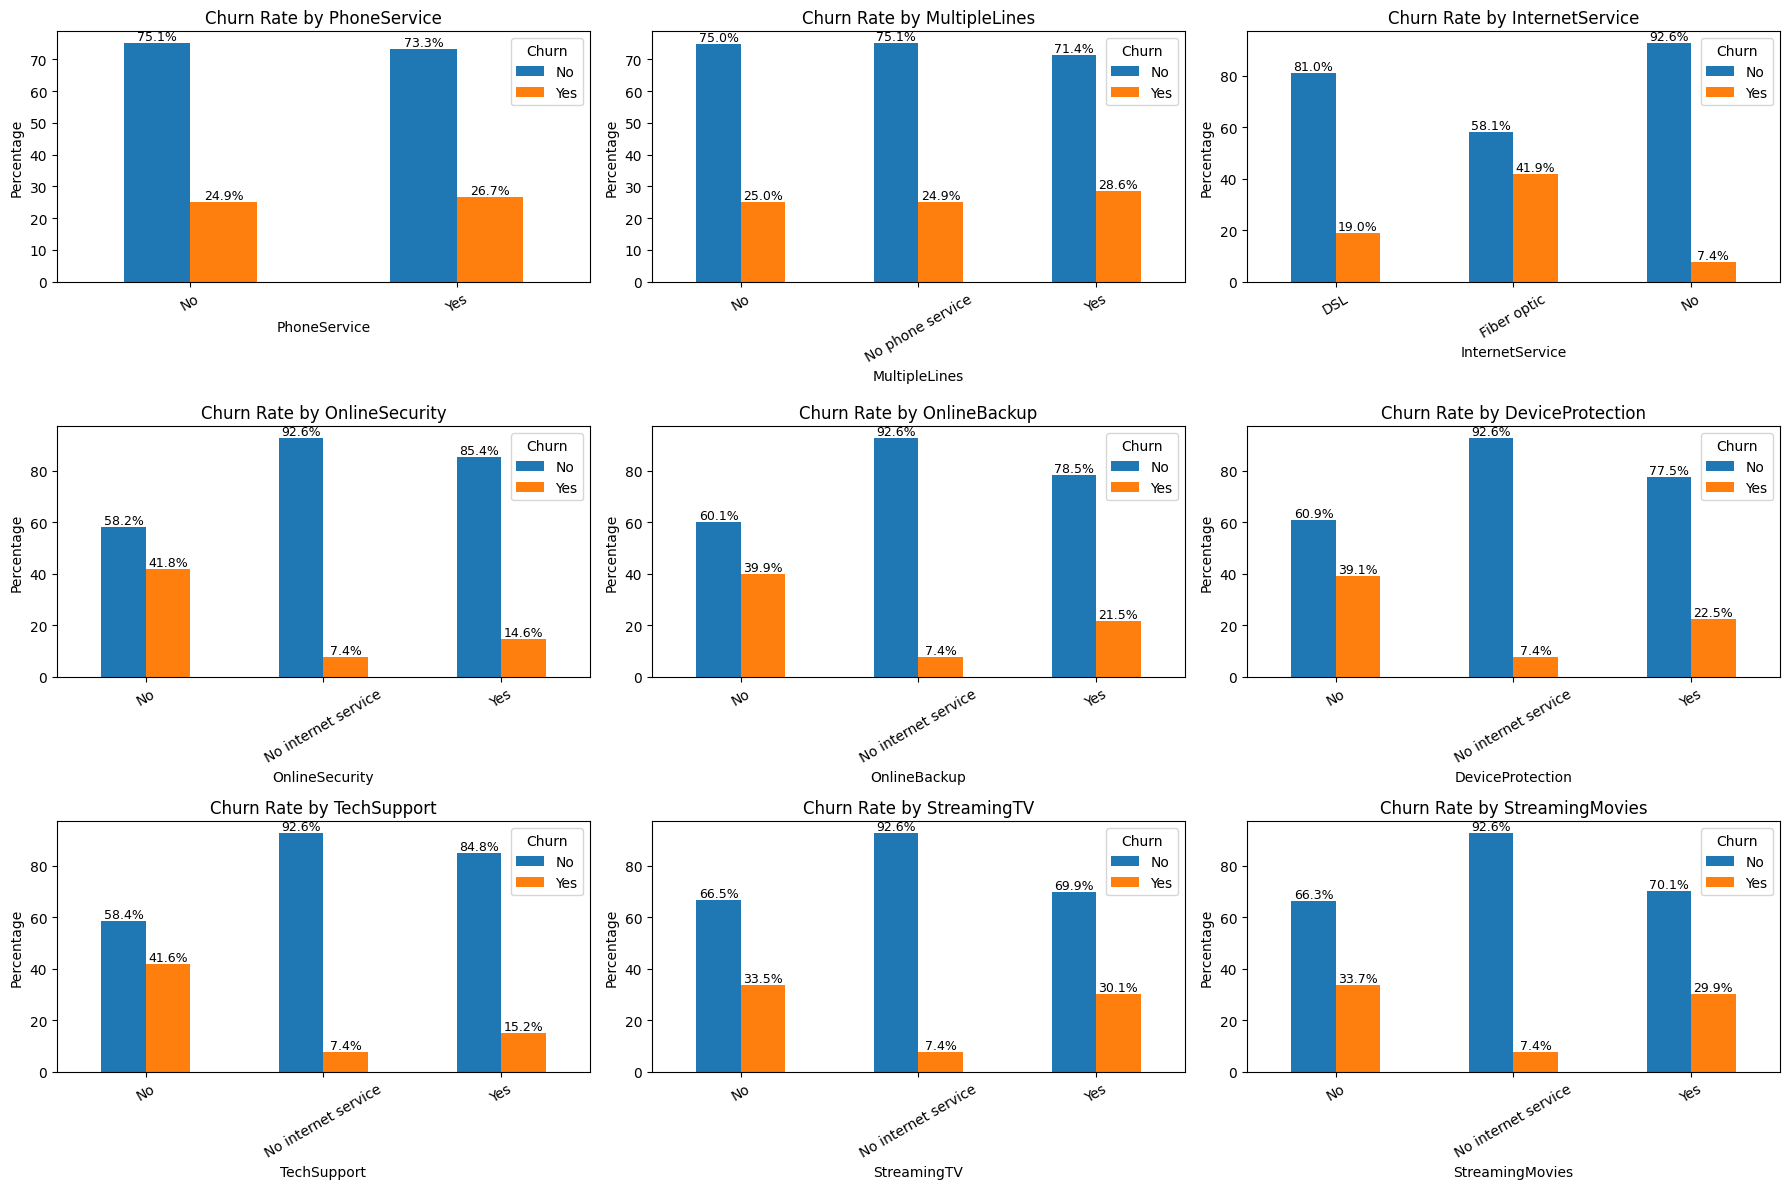

In [45]:
cols = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

n_cols = 3
n_rows = math.ceil(len(cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate(cols):
    ax = axes[i]

    # Crosstab with percentage
    ct = pd.crosstab(df[col], df["Churn"], normalize="index") * 100

    # Plot
    ct.plot(kind="bar", ax=ax)

    ax.set_title(f"Churn Rate by {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Percentage")
    ax.tick_params(axis='x', rotation=30)

    # Add % labels
    for container in ax.containers:
        ax.bar_label(container, fmt="%.1f%%", fontsize=9)

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


#Customers without services such as:
#Online Security
#Tech Support
#Device Protection
#Show higher churn percentages.

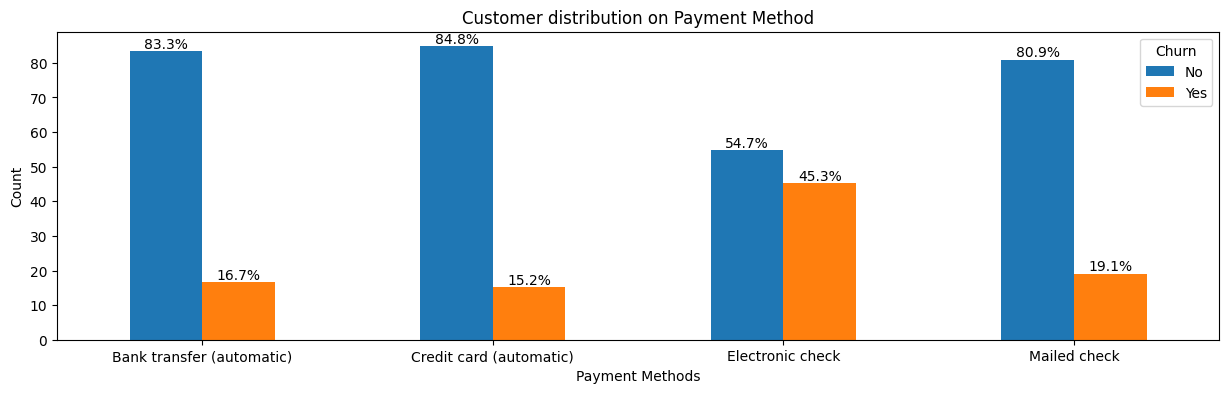

In [46]:
ct = pd.crosstab(df["PaymentMethod"], df["Churn"], normalize="index") * 100

ax = ct.plot(kind="bar", figsize=(15,4))

for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%")
plt.title("Customer distribution on Payment Method")
plt.xticks(rotation=0)
plt.xlabel("Payment Methods")
plt.ylabel("Count")
plt.show()

#Customers using Electronic Check have the highest churn rate.
#Customers using credit cards, bank transfers, or auto-pay methods show significantly lower churn.